# Czövek Benedek - Adatbázisok Házi feladat 01

A webshop adatbázis 'Rendeles' tábláját fogom vizsgálni.

  

  

<span style="color: var(--vscode-foreground);">Először megnézem a sorok számát és az oszlopok null értékeinek számát.</span>

In [70]:
SELECT 
    COUNT(*) AS "Összes sor db",
    SUM(IIF(SORSZAM IS NULL, 1, 0)) AS "SORSZAM null db",
    SUM(IIF(LOGIN IS NULL, 1, 0)) AS "LOGIN null db",
    SUM(IIF(REND_DATUM IS NULL, 1, 0)) AS "REND_DATUM null db",
    SUM(IIF(SZALL_DATUM IS NULL, 1, 0)) AS "SZALL_DATUM null db",
    SUM(IIF(SZALL_CIM IS NULL, 1, 0)) AS "SZALL_CIM null db",
    SUM(IIF(SZALL_MOD IS NULL, 1, 0)) AS "SZALL_MOD null db",
    SUM(IIF(FIZ_MOD IS NULL, 1, 0)) AS "FIZ_MOD null db",
    SUM(IIF(SZAMLA_CIM IS NULL, 1, 0)) AS "SZAMLA_CIM null db"
FROM Rendeles

(1 row affected)

Total execution time: 00:00:00.223

Összes sor db,SORSZAM null db,LOGIN null db,REND_DATUM null db,SZALL_DATUM null db,SZALL_CIM null db,SZALL_MOD null db,FIZ_MOD null db,SZAMLA_CIM null db
28085,0,0,0,0,21689,0,0,25535


Mivel csak a SZALL\_CIM és SZAMLA\_CIM oszlopokban voltak null értékek, ezért itt megnézem ezeknek a százalékos arányát is.

In [71]:
SELECT 
    ROUND((SUM(IIF(SZALL_CIM IS NULL, 1, 0))*100.0/ COUNT(*)) ,2) AS 'SZALL_CIM százalékos aránya',
    ROUND((SUM(IIF(SZAMLA_CIM IS NULL, 1, 0)) * 100.0 / COUNT(*)),2) AS 'SZAMLA_CIM százalékos aránya'
FROM Rendeles

(1 row affected)

Total execution time: 00:00:02.900

SZALL_CIM százalékos aránya,SZAMLA_CIM százalékos aránya
77.230000000000,90.920000000000


A null értékek eloszlásáról készítettem excel diagrammokat is.

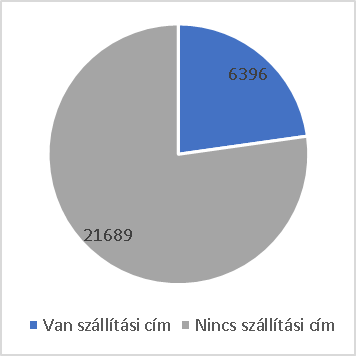   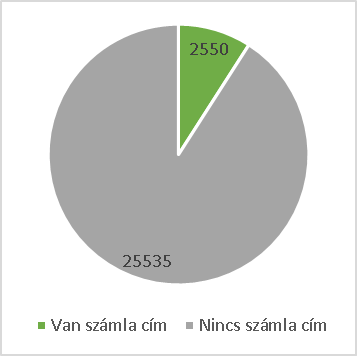

A rendelési és szállítási dátumok alapján megnézem a fontosabb minimum, maximum és átlag értékeket.

In [72]:
SELECT 
    MIN(REND_DATUM) AS 'Min. rendelési dátum',
    MAX(REND_DATUM) AS 'Max. rendelési dátum',
    MIN(SZALL_DATUM) AS 'Min. szállítási dátum',
    MAX(SZALL_DATUM) AS 'Max. szállítási dátum',
    CAST(AVG(DATEDIFF(day, REND_DATUM, SZALL_DATUM)) as nvarchar(20)) + ' nap' AS 'Átlagos szállítási idő',
    CAST(MIN(DATEDIFF(day, REND_DATUM, SZALL_DATUM)) as nvarchar(20)) + ' nap' AS 'Leggyorsabb szállítási idő',
    CAST(MAX(DATEDIFF(day, REND_DATUM, SZALL_DATUM)) as nvarchar(20)) + ' nap' AS 'Leglassabb szállítási idő'
FROM Rendeles

(1 row affected)

Total execution time: 00:00:00.040

Min. rendelési dátum,Max. rendelési dátum,Min. szállítási dátum,Max. szállítási dátum,Átlagos szállítási idő,Leggyorsabb szállítási idő,Leglassabb szállítási idő
2015-05-01,2017-04-01,2015-05-03,2017-04-11,5 nap,2 nap,10 nap


A szállítási módok szerinti eloszlásban is megvizsgálom az átlagos szállítási időt

In [73]:
SELECT 
    SZALL_MOD AS 'Szállítási mód',
    CAST(AVG(DATEDIFF(day, REND_DATUM, SZALL_DATUM)) as nvarchar(20)) + ' nap' AS 'Átlagos szállítási idő'
FROM Rendeles
GROUP BY SZALL_MOD

(3 rows affected)

Total execution time: 00:00:00.031

Szállítási mód,Átlagos szállítási idő
GLS,6 nap
Személyes átvétel,5 nap
Posta,5 nap


Itt látható az átlagos szállítási idő napokban szállítási módonként.

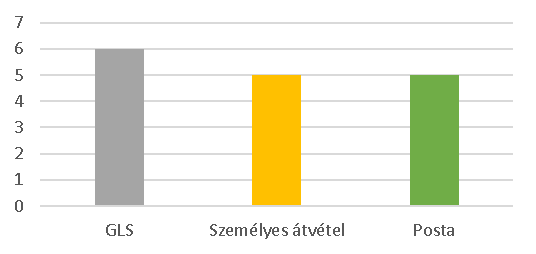

Megnézem a rendelések darabszámát a fizetési és szállítási módok szerint csoportosítva.

In [74]:
SELECT 
    IIF(FIZ_MOD IS NULL, 'Összesített fiz. mód', FIZ_MOD) AS 'Fizetési mód',
    IIF(SZALL_MOD IS NULL, 'Összesített száll. mód', SZALL_MOD) AS 'Szállítási mód',
    COUNT(*) AS 'Rendelés db'
FROM Rendeles
GROUP BY ROLLUP(FIZ_MOD, SZALL_MOD)

(13 rows affected)

Total execution time: 00:00:00.040

Fizetési mód,Szállítási mód,Rendelés db
Átutalás,GLS,3777
Átutalás,Posta,3709
Átutalás,Személyes átvétel,3798
Átutalás,Összesített száll. mód,11284
Bankkártya,GLS,4701
Bankkártya,Posta,4607
Bankkártya,Személyes átvétel,4695
Bankkártya,Összesített száll. mód,14003
Készpénz,GLS,948
Készpénz,Posta,875


Itt megnézem egy-egy szálítási cím hányszor szerepel a táblázatban.

In [76]:
SELECT IIF(SZALL_CIM IS NULL, 'Összesen', SZALL_CIM) AS 'Cím',
       COUNT(*) AS 'Darabszám'
FROM Rendeles
WHERE SZALL_CIM IS NOT NULL
GROUP BY ROLLUP(SZALL_CIM)
ORDER BY 2 DESC

(300 rows affected)

Total execution time: 00:00:00.032

Cím,Darabszám
Összesen,6396
"Budapest, Fő u. 2.",303
"Budapest, Kiss u. 32.",215
"Győr, Fő u. 2.",154
"Budapest, Nagy u.14.",131
"Jászkisér, Fő u. 2.",123
"Győr, Kiss u. 32.",93
"Törökszentmiklós, Fő u. 2.",90
"Ruzsa, Fő u. 2.",81
"Jászkisér, Kiss u. 32.",76


Készítettem egy excel diagramot is, ami mutatja az 5 leggyakoribb cím eloszlását.

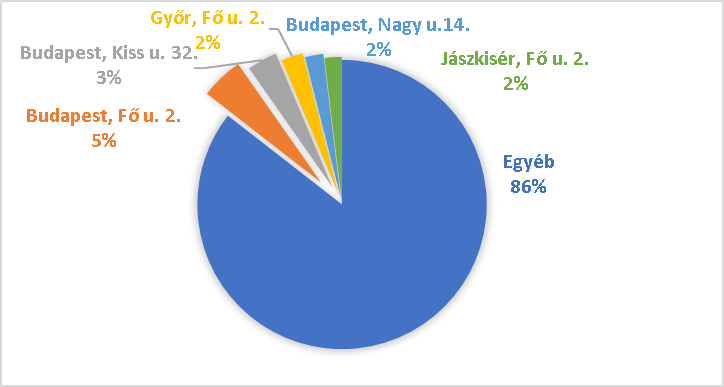